# Ejercicio Ridge, Lasso y ElasticNet
Para este ejercicio vas a trabajar con datos de ventas de una empresa que fabrica muebles en España. Esta empresa es una Pyme que demanda conocer de antemano qué ingresos va a tener cada mes, ya que necesita pedir un anticipio a su entidad financiera de cara a poder abastecerse de materia prima al comenzar el mes. Como desconoce cuánto tiene que pedir, tira al alza y acaba pagando muchos intereses. El objetivo es reducir estos gastos.

En las bases de datos de la empresa constan todos los gastos en publicidad y ventas, para cada uno de los meses desde su fundación (hace más de 15 años).

Dado que los presupuestos de marketing se cierran al principio de cada mes, la empresa necesita un modelo predictivo que le anticipe las ventas que conseguirá a final de mes en función de los gastos que realizará en marketing.

Para ello tendrás que utilizar tanto modelos de regresión normales, como regularizados.

1. Carga los datos y realiza un pequeño análisis exploratorio. Mira a ver cómo se relaciona las ventas con el resto de variables.
2. Crea varios modelos y modifica los hiperparámetros necesarios para mejorar el performance del modelo.
3. Interpreta los resultados. Traduce a una fórmula tu mejor modelo (escribir la fórmula simplemente).


### ¿Cuánto cambian las ventas si aumentamos la inversión en radio un punto más? 
### ¿Y si aumentamos la inversión en TV o periódicos?

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns


In [2]:
import pandas as pd

df = pd.read_csv("data/Advertising.csv", index_col=0)
df

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0
...,...,...,...,...
195,38.2,3.7,13.8,7600.0
196,94.2,4.9,8.1,9700.0
197,177.0,9.3,6.4,12800.0
198,283.6,42.0,66.2,25500.0


In [3]:
df.head()

,TV,radio,newpaper,sales
0,230.1,37.8,6s9.2,22100.0
1,44.5,39.3,45.1,10400.0
2,17.2,45.9,69.3,9300.0
3,151.5,41.3,58.5,18500.0
4,180.8,10.8,58.4,12900.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TV        200 non-null    float64
 1   radio     200 non-null    float64
 2   newpaper  200 non-null    object 
 3   sales     200 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.describe()

,TV,radio,sales
count,200.000000,200.000000,200.000000
mean,147.042500,23.264000,14022.500000
std,85.854236,14.846809,5217.456566
min,0.700000,0.000000,1600.000000
25%,74.375000,9.975000,10375.000000
50%,149.750000,22.900000,12900.000000
75%,218.825000,36.525000,17400.000000
max,296.400000,49.600000,27000.000000


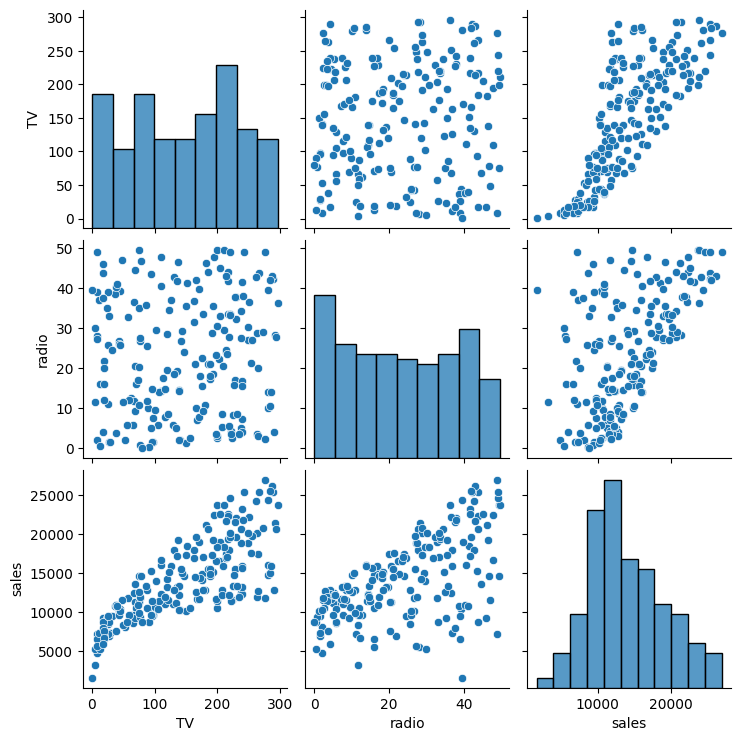

In [6]:
import seaborn as sns

sns.pairplot(df);

In [14]:
muestras_totales = 200
muestras_entrenamiento = 60

In [15]:
# Features
X_train = df.iloc[:muestras_entrenamiento,0:-2]
X_test = df.iloc[muestras_entrenamiento:,0:-2]

# Target
y_train = df.iloc[:muestras_entrenamiento,-1] 
y_test = df.iloc[muestras_entrenamiento:,-1]

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 2)
(140, 2)
(60,)
(140,)


In [17]:
from sklearn import linear_model, metrics

lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))

Train MSE: 2665370.5128121194
Test MSE: 2871057.572015196


In [18]:
from sklearn.linear_model import Ridge

# lambda -> alpha
ridgeR = Ridge(alpha = 25)
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))
print("-"*50)
print("Train MSE con regularización:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE con regularización:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))

Train MSE sin regularización: 2665370.51
Test MSE sin regularización: 2871057.57
--------------------------------------------------
Train MSE con regularización: 2665402.76
Test MSE con regularización: 2868547.33


In [19]:

n_alphas = 100
alphas = np.logspace(-4, 3, n_alphas)

print(f"Variaremos los valores entre {np.min(alphas)} y {np.max(alphas)}")

Variaremos los valores entre 0.0001 y 1000.0


In [20]:
coef_ridge = []
err_ridge = []
baseline = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    
    coef_ridge.append(ridge.coef_)
    
    y_pred = ridge.predict(X_test)
    ridge_error = metrics.mean_squared_error(y_pred, y_test)
    
    err_ridge.append(ridge_error)
    baseline.append(baseline_error)

In [21]:
print(f"Hemos obtenido un valor mínimo de {min(err_ridge)}")

Hemos obtenido un valor mínimo de 2824279.065648562


<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\653123150.py:8: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


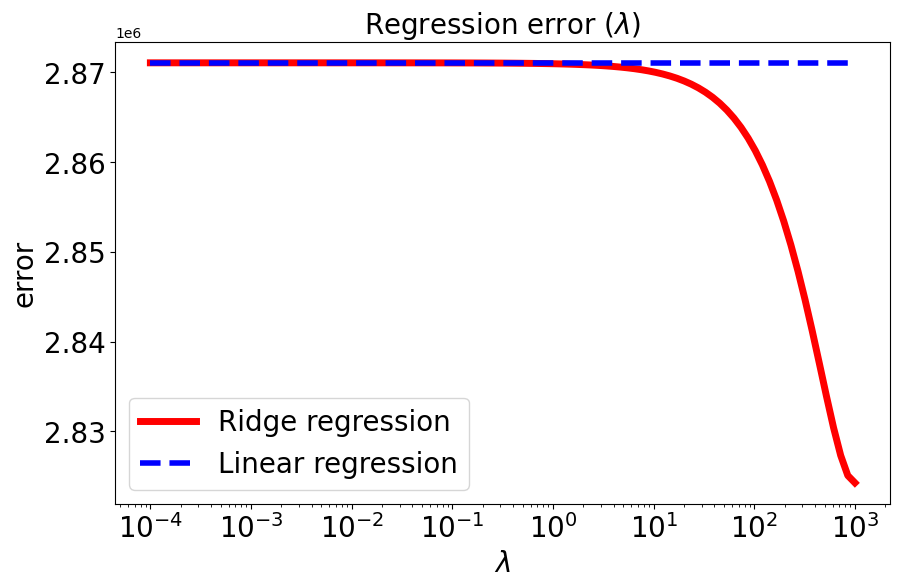

In [22]:
plt.figure(figsize=(10,6))
font = 20

ax = plt.gca()
ax.plot(alphas, err_ridge, linewidth=5, color='red', label="Ridge regression")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\lambda$)', fontsize=font)
plt.show()

In [23]:
from sklearn.linear_model import Ridge 
  
# Train the model  
ridgeR = Ridge(alpha = 10) 
ridgeR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, ridgeR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, ridgeR.predict(X_test)))

Train MSE: 2665375.6845
Test MSE: 2870043.9703


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\935174922.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


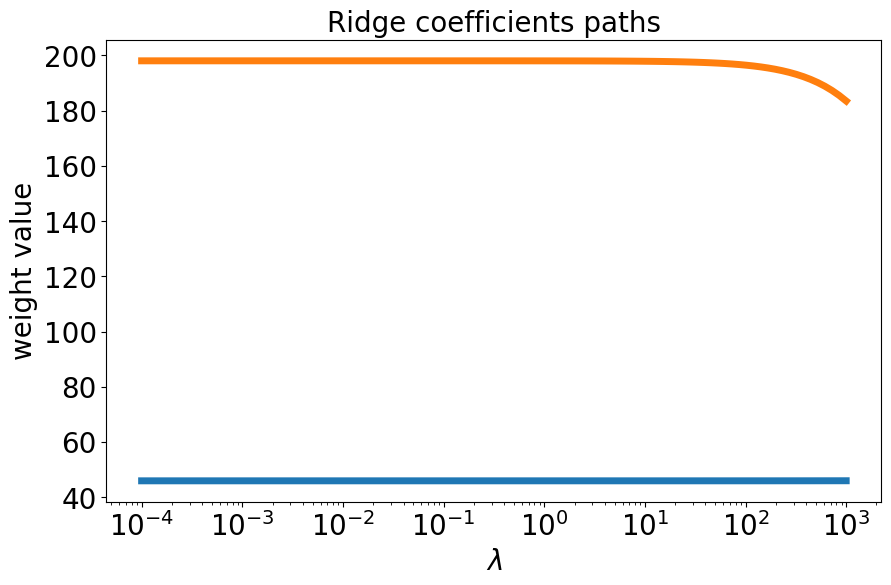

In [24]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas, coef_ridge, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('weight value', fontsize=font)
plt.title('Ridge coefficients paths', fontsize=font)
plt.show()

In [25]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))
print("-"*50)
print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 2665370.51
Test MSE sin regularización: 2871057.57
--------------------------------------------------
Train MSE: 2665370.5129
Test MSE: 2871054.5017


In [26]:
lasso = Lasso(fit_intercept=False) # No ajustar el c0

coef_lasso = []
err_lasso = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coef_lasso.append(lasso.coef_)
    y_pred = lasso.predict(X_test)
    lasso_error = metrics.mean_squared_error(y_pred, y_test)    
    err_lasso.append(lasso_error)

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\1925623617.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


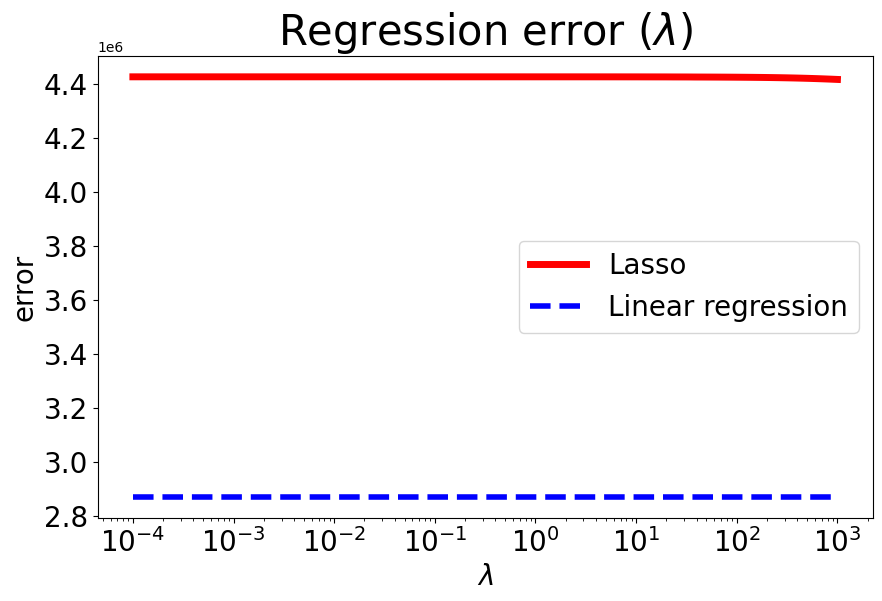

In [27]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas, err_lasso, linewidth=5, color='red', label="Lasso")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\lambda$)', fontsize=30)
plt.show()

In [28]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 2665370.5128
Test MSE: 2871056.9446


In [29]:
print("Test MAPE: %0.4f" % metrics.mean_absolute_percentage_error(y_test, lassoR.predict(X_test)))

Test MAPE: 0.1541


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\4273407513.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


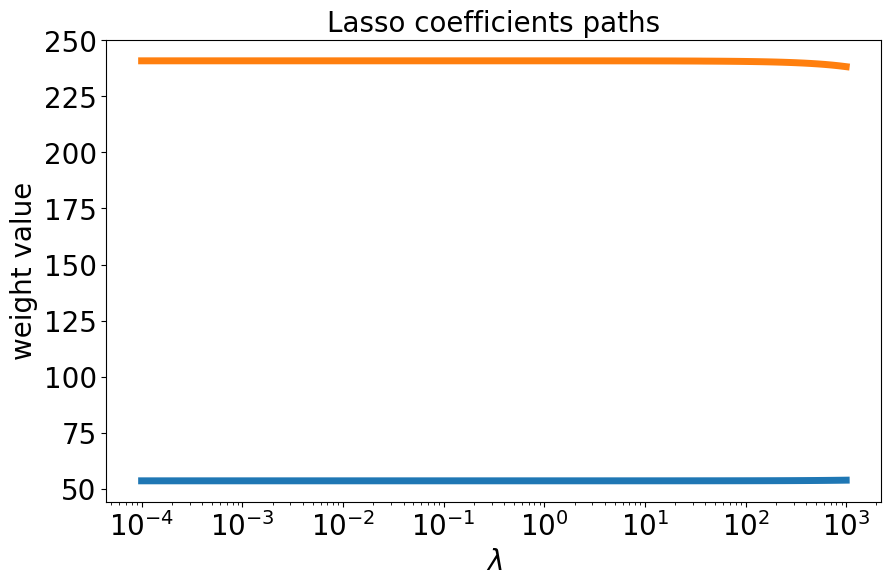

In [30]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas, coef_lasso, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('weight value', fontsize=font)
plt.title('Lasso coefficients paths', fontsize=font)
plt.show()

In [31]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 1, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2665417.3802
Test MSE: 2868039.6696


In [32]:
coef_eln = []
err_eln = []
baseline = []
for a in alphas:
    elastic_net = ElasticNet(alpha = a, l1_ratio=1)
    elastic_net.fit(X_train, y_train)
    coef_eln.append(elastic_net.coef_)
    y_pred = elastic_net.predict(X_test)
    elasticnet_error = metrics.mean_squared_error(y_pred, y_test)
    err_eln.append(elasticnet_error)
    baseline.append(baseline_error)

In [33]:
min(err_eln)

np.float64(2844858.710247978)

<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\4048464108.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


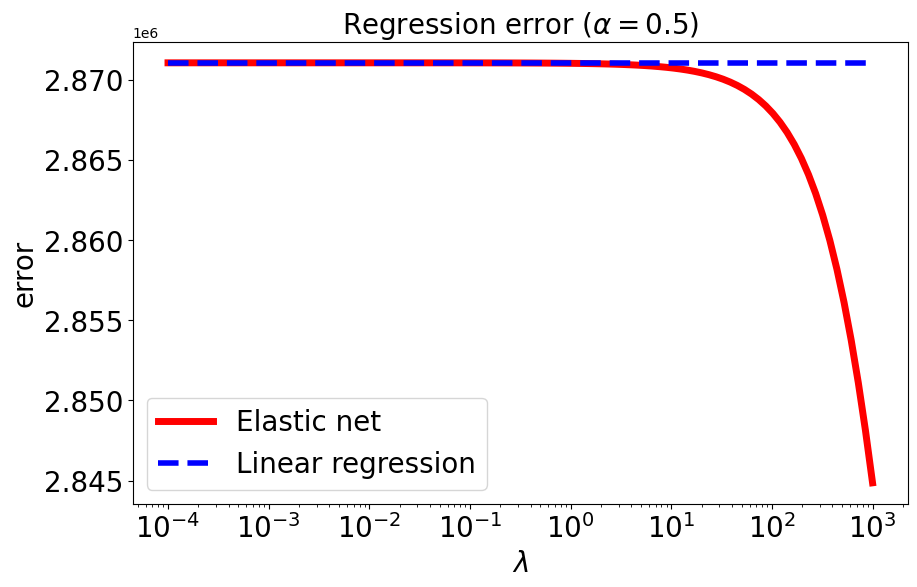

In [34]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas, err_eln, linewidth=5, color='red', label="Elastic net")
ax.plot(alphas, baseline, linewidth=4,linestyle='--', color='blue', label='Linear regression')
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('error', fontsize=font)
ax.legend(fontsize=font)
plt.title(r'Regression error ($\alpha=0.5$)', fontsize=font)
plt.show()

In [35]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 2665370.5128
Test MSE: 2871056.9446


<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
C:\Users\amejo\AppData\Local\Temp\ipykernel_25656\3676289475.py:6: SyntaxWarning: invalid escape sequence '\l'
  plt.xlabel('$\lambda$', fontsize=font)


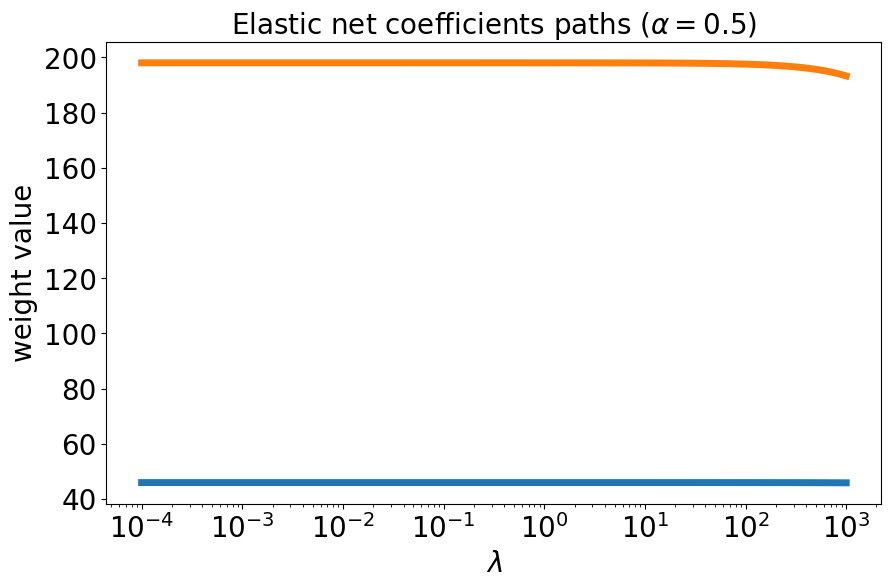

In [36]:
plt.figure(figsize=(10,6))

ax = plt.gca()
ax.plot(alphas, coef_eln, linewidth=5)
ax.set_xscale('log')
plt.xlabel('$\lambda$', fontsize=font)
plt.xticks(fontsize=font)
plt.yticks(fontsize=font)
plt.ylabel('weight value', fontsize=font)
plt.title(r'Elastic net coefficients paths ($\alpha=0.5$)', fontsize=font)
plt.show()